<h1 style = "color : #1E90FF; font-family : 'Brush Script MT', cursive;"> Cluster Analysis On latest FIFA Dataset </h1>

<h2 style = "color : #6495ED; font-family : 'Pacifico', cursive;"> Problem Definition </h2>

<b style = "color : #FF7F50; font-family : 'Allura', cursive; font-size : 17px"> 
<ul>
    <li> Objective: </li> <b style = "color : #6495ED"> Categorize players based on skillset, strength, and physical attributes for better player management and replacement selection. </b>
    <li> Outcome: </li> <b style = "color : #6495ED"> Identify distinct groups of players and determine the best clustering technique using silhouette scores. </b>
</ul>
</b>

<h2 style = "color : #6495ED; font-family : 'Pacifico', cursive;"> Data Preprocessing </h2>

<h3 style = "color : #FF7F50; font-family : 'Pacifico', cursive;"> Importing Required Libraries </h3>

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

<h3 style = "color : #FF7F50; font-family : 'Pacifico', cursive;"> Importing Dataset </h3>

In [2]:
# Loading the dataset
fifa_data = pd.read_csv('Dataset/Fifa 23 Players Data.csv')

In [3]:
# Few rows of data
fifa_data.head()

Known As           Full Name  Overall  Potential  Value(in Euro)  \
0        L. Messi        Lionel Messi       91         91        54000000   
1      K. Benzema       Karim Benzema       91         91        64000000   
2  R. Lewandowski  Robert Lewandowski       91         91        84000000   
3    K. De Bruyne     Kevin De Bruyne       91         91       107500000   
4       K. Mbappé       Kylian Mbappé       91         95       190500000   

  Positions Played Best Position Nationality  \
0               RW           CAM   Argentina   
1            CF,ST            CF      France   
2               ST            ST      Poland   
3           CM,CAM            CM     Belgium   
4            ST,LW            ST      France   

                                         Image Link  Age  ...  LM Rating  \
0  https://cdn.sofifa.net/players/158/023/23_60.png   35  ...         91   
1  https://cdn.sofifa.net/players/165/153/23_60.png   34  ...         89   
2  https://cdn.sofifa.net/players/188/545/23_60.png   33  ...         86   
3  https://cdn.sofifa.net/players/192/985/23_60.png   31  ...         91   
4  https://cdn.sofifa.net/players/231/747/23_60.png   23  ...         92   

   CM Rating  RM Rating  LWB Rating CDM Rating  RWB Rating  LB Rating  \
0         88         91          67         66          67         62   
1         84         89          67         67          67         63   
2         83         86          67         69          67         64   
3         91         91          82         82          82         78   
4         84         92          70         66          70         66   

  CB Rating RB Rating GK Rating  
0        53        62        22  
1        58        63        21  
2        63        64        22  
3        72        78        24  
4        57        66        21  

[5 rows x 89 columns]

In [4]:
# Dataset Information
fifa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18539 entries, 0 to 18538
Data columns (total 89 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Known As                     18539 non-null  object
 1   Full Name                    18539 non-null  object
 2   Overall                      18539 non-null  int64 
 3   Potential                    18539 non-null  int64 
 4   Value(in Euro)               18539 non-null  int64 
 5   Positions Played             18539 non-null  object
 6   Best Position                18539 non-null  object
 7   Nationality                  18539 non-null  object
 8   Image Link                   18539 non-null  object
 9   Age                          18539 non-null  int64 
 10  Height(in cm)                18539 non-null  int64 
 11  Weight(in kg)                18539 non-null  int64 
 12  TotalStats                   18539 non-null  int64 
 13  BaseStats                    18

In [5]:
# Statistical Information
fifa_data.describe()

Overall     Potential  Value(in Euro)           Age  \
count  18539.000000  18539.000000    1.853900e+04  18539.000000   
mean      65.852042     71.016668    2.875461e+06     25.240412   
std        6.788353      6.192866    7.635129e+06      4.718163   
min       47.000000     48.000000    0.000000e+00     16.000000   
25%       62.000000     67.000000    4.750000e+05     21.000000   
50%       66.000000     71.000000    1.000000e+06     25.000000   
75%       70.000000     75.000000    2.000000e+06     29.000000   
max       91.000000     95.000000    1.905000e+08     44.000000   

       Height(in cm)  Weight(in kg)    TotalStats     BaseStats  \
count   18539.000000   18539.000000  18539.000000  18539.000000   
mean      181.550839      75.173904   1602.114569    357.946221   
std         6.858097       7.013593    273.160237     39.628259   
min       155.000000      49.000000    759.000000    224.000000   
25%       177.000000      70.000000   1470.000000    331.000000   
50%       182.000000      75.000000   1640.000000    358.000000   
75%       186.000000      80.000000   1786.000000    385.000000   
max       206.000000     105.000000   2312.000000    502.000000   

       Wage(in Euro)  Release Clause  ...     LM Rating     CM Rating  \
count   18539.000000    1.853900e+04  ...  18539.000000  18539.000000   
mean     8824.537462    5.081688e+06  ...     58.451319     57.374076   
std     19460.531154    1.467203e+07  ...     13.987122     13.171194   
min         0.000000    0.000000e+00  ...     18.000000     18.000000   
25%      1000.000000    6.650000e+05  ...     54.000000     53.000000   
50%      3000.000000    1.500000e+06  ...     62.000000     60.000000   
75%      8000.000000    3.400000e+06  ...     67.000000     66.000000   
max    450000.000000    3.667000e+08  ...     92.000000     91.000000   

          RM Rating    LWB Rating    CDM Rating    RWB Rating     LB Rating  \
count  18539.000000  18539.000000  18539.000000  18539.000000  18539.000000   
mean      58.451319     56.281569     55.928583     56.281569     55.650251   
std       13.987122     13.903836     13.872190     13.903836     14.159466   
min       18.000000     17.000000     19.000000     17.000000     17.000000   
25%       54.000000     51.000000     48.000000     51.000000     49.000000   
50%       62.000000     59.000000     59.000000     59.000000     59.000000   
75%       67.000000     66.000000     66.000000     66.000000     65.000000   
max       92.000000     88.000000     89.000000     88.000000     87.000000   

          CB Rating     RB Rating     GK Rating  
count  18539.000000  18539.000000  18539.000000  
mean      54.528184     55.650251     23.257134  
std       14.743929     14.159466     15.108925  
min       18.000000     17.000000     10.000000  
25%       45.000000     49.000000     17.000000  
50%       58.000000     59.000000     18.000000  
75%       66.000000     65.000000     20.000000  
max       90.000000     87.000000     90.000000  

[8 rows x 71 columns]

In [6]:
# Columns in dataset
fifa_data.columns

Index(['Known As', 'Full Name', 'Overall', 'Potential', 'Value(in Euro)',
       'Positions Played', 'Best Position', 'Nationality', 'Image Link', 'Age',
       'Height(in cm)', 'Weight(in kg)', 'TotalStats', 'BaseStats',
       'Club Name', 'Wage(in Euro)', 'Release Clause', 'Club Position',
       'Contract Until', 'Club Jersey Number', 'Joined On', 'On Loan',
       'Preferred Foot', 'Weak Foot Rating', 'Skill Moves',
       'International Reputation', 'National Team Name',
       'National Team Image Link', 'National Team Position',
       'National Team Jersey Number', 'Attacking Work Rate',
       'Defensive Work Rate', 'Pace Total', 'Shooting Total', 'Passing Total',
       'Dribbling Total', 'Defending Total', 'Physicality Total', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Powe

In [7]:
# Shape of Dataset
# The shape is the number of rows and columns of the DataFrame

fifa_data.shape

(18539, 89)

<h3 style = "color : #FF7F50; font-family : 'Pacifico', cursive;"> Handling Missing Data </h3>

In [8]:
# Checking null values
fifa_data.isnull().sum()

Known As          0
Full Name         0
Overall           0
Potential         0
Value(in Euro)    0
                 ..
RWB Rating        0
LB Rating         0
CB Rating         0
RB Rating         0
GK Rating         0
Length: 89, dtype: int64

In [9]:
# Checking null values columnwise
for col in fifa_data.columns:
    print(f'{col} : ', fifa_data[col].isnull().sum())

Known As :  0
Full Name :  0
Overall :  0
Potential :  0
Value(in Euro) :  0
Positions Played :  0
Best Position :  0
Nationality :  0
Image Link :  0
Age :  0
Height(in cm) :  0
Weight(in kg) :  0
TotalStats :  0
BaseStats :  0
Club Name :  0
Wage(in Euro) :  0
Release Clause :  0
Club Position :  0
Contract Until :  0
Club Jersey Number :  0
Joined On :  0
On Loan :  0
Preferred Foot :  0
Weak Foot Rating :  0
Skill Moves :  0
International Reputation :  0
National Team Name :  0
National Team Image Link :  0
National Team Position :  0
National Team Jersey Number :  0
Attacking Work Rate :  0
Defensive Work Rate :  0
Pace Total :  0
Shooting Total :  0
Passing Total :  0
Dribbling Total :  0
Defending Total :  0
Physicality Total :  0
Crossing :  0
Finishing :  0
Heading Accuracy :  0
Short Passing :  0
Volleys :  0
Dribbling :  0
Curve :  0
Freekick Accuracy :  0
LongPassing :  0
BallControl :  0
Acceleration :  0
Sprint Speed :  0
Agility :  0
Reactions :  0
Balance :  0
Shot Powe

<h3 style = "color : #FF7F50; font-family : 'Pacifico', cursive;"> Feature Selection </h3>

<b style = "color : #FF7F50; font-family : 'Allura', cursive; font-size : 15px"> 
<ul>
    <li> Performance Metrics: </li> <b style = "color : #6495ED"> Overall, Potential, Pace Total, Shooting Total, Passing Total, Dribbling Total, Defending Total, Physicality Total </b>
    <li> Physical Attributes: </li> <b style = "color : #6495ED"> Height(in cm), Weight(in kg), Strength, Stamina </b>
    <li> Financial Metrics: </li> <b style = "color : #6495ED"> Value(in Euro), Wage(in Euro) </b>
    <li> Categorical Features: </li> <b style = "color : #6495ED"> Nationality, Club Name </b>
</ul>
</b>

In [10]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [11]:
# Selecting relevant columns based on the focus areas
features = [
    'Overall', 'Potential', 'Pace Total', 'Shooting Total', 'Passing Total', 
    'Dribbling Total', 'Defending Total', 'Physicality Total',
    'Height(in cm)', 'Weight(in kg)', 'Strength', 'Stamina',
    'Value(in Euro)', 'Wage(in Euro)', 'Nationality', 'Club Name'
]

In [12]:
# Creating the new DataFrame with only the selected features
features = fifa_data[features]

In [13]:
# Encoding Categorical Variables (Nationality and Club Name)
data = pd.get_dummies(features, columns = ['Nationality', 'Club Name'], drop_first = True)

In [14]:
# Scaling Numerical Features
numerical_features = [
    'Overall', 'Potential', 'Pace Total', 'Shooting Total', 'Passing Total', 
    'Dribbling Total', 'Defending Total', 'Physicality Total', 
    'Height(in cm)', 'Weight(in kg)', 'Strength', 'Stamina',
    'Value(in Euro)', 'Wage(in Euro)'
]

In [15]:
# Standardizing the numerical columns
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [16]:
# Displaying the first few rows to check the selected features
data.head()

Overall  Potential  Pace Total  Shooting Total  Passing Total  \
0  3.704674   3.226918    1.219080        2.586154       3.290461   
1  3.704674   3.226918    1.125176        2.512730       2.570125   
2  3.704674   3.226918    0.655658        2.733003       2.158504   
3  3.704674   3.226918    0.561755        2.512730       3.599176   
4  3.704674   3.872840    2.721537        2.586154       2.261410   

   Dribbling Total  Defending Total  Physicality Total  Height(in cm)  \
0         3.308634        -0.990806          -0.080955      -1.830125   
1         2.558874        -0.685781           1.380811       0.502946   
2         2.451765        -0.380756           1.902871       0.502946   
3         2.558874         0.839345           1.276400      -0.080322   
4         3.094417        -0.868796           1.171988       0.065495   

   Weight(in kg)  ...  Club Name_Wuhan Three Towns  \
0      -1.165469  ...                        False   
1       0.830709  ...                        False   
2       0.830709  ...                        False   
3      -0.737716  ...                        False   
4      -0.309964  ...                        False   

   Club Name_Wycombe Wanderers  Club Name_Yukatel Kayserispor  \
0                        False                          False   
1                        False                          False   
2                        False                          False   
3                        False                          False   
4                        False                          False   

   Club Name_Zagłębie Lubin  Club Name_Zhejiang Professional FC  \
0                     False                               False   
1                     False                               False   
2                     False                               False   
3                     False                               False   
4                     False                               False   

   Club Name_Ümraniyespor  Club Name_İstanbul Başakşehir FK  \
0                   False                             False   
1                   False                             False   
2                   False                             False   
3                   False                             False   
4                   False                             False   

   Club Name_İstanbulspor  Club Name_İttifak Holding Konyaspor  \
0                   False                                False   
1                   False                                False   
2                   False                                False   
3                   False                                False   
4                   False                                False   

   Club Name_Śląsk Wrocław  
0                    False  
1                    False  
2                    False  
3                    False  
4                    False  

[5 rows x 851 columns]

<h4 style = "color : #ADD8E6; font-family : 'Pacifico', cursive;"> Explanation: </h4>
<b style = "color : #FF7F50; font-family : 'Allura', cursive; font-size : 15px"> 
<ul>
    <li> Feature Selection: </li> <b style = "color : #6495ED"> The relevant features are selected based on the list. </b>
    <li> One-hot encoding: </li> <b style = "color : #6495ED"> This converts categorical features ('Nationality' and 'Club Name') into binary columns, using pd.get_dummies. </b>
    <li> Standardization: </li> <b style = "color : #6495ED"> StandardScaler standardizes the numerical columns to have zero mean and unit variance, ensuring equal contribution from all features during clustering. </b>
</ul>
</b>

<h2 style = "color : #6495ED; font-family : 'Pacifico', cursive;"> EDA (Exploratory Data Analysis) </h2>

In [17]:
# Importing required libraries

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

<h3 style = "color : #FF7F50; font-family : 'Pacifico', cursive;"> Univariate Analysis </h3>

In [18]:
# Numerical Features Distribution
numerical_features = [
    'Overall', 'Potential', 'Pace Total', 'Shooting Total', 'Passing Total',
    'Dribbling Total', 'Defending Total', 'Physicality Total',
    'Height(in cm)', 'Weight(in kg)', 'Strength', 'Stamina',
    'Value(in Euro)', 'Wage(in Euro)'
]

<Figure size 1500x1200 with 0 Axes>

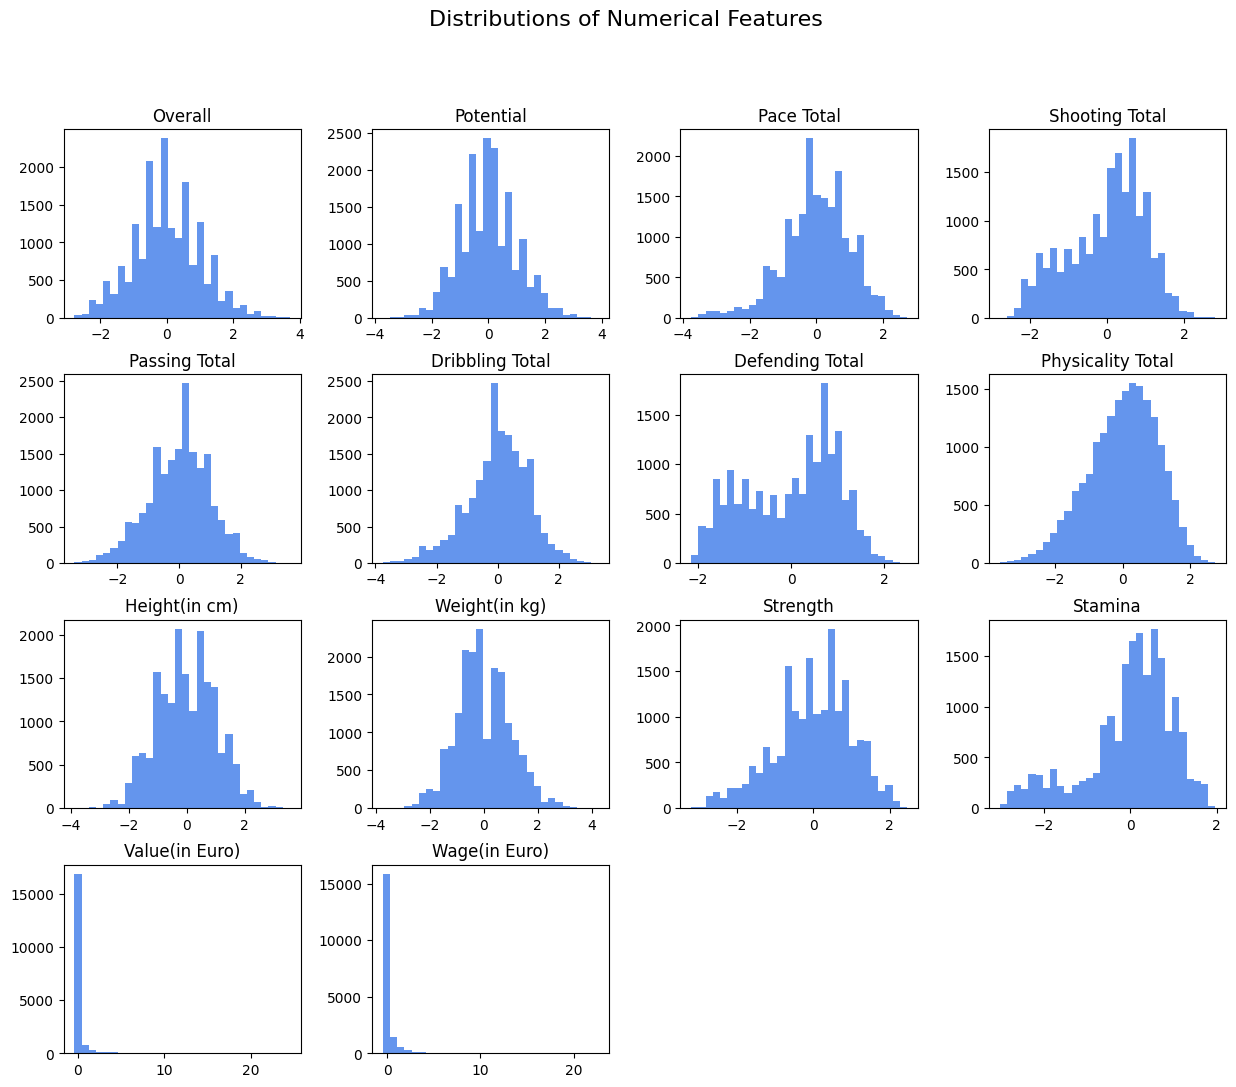

In [19]:
# Plotting Histograms for Numerical Features
plt.figure(figsize = (15, 12))
data[numerical_features].hist(bins = 30, figsize = (15, 12), color = 'cornflowerblue', grid = False)
plt.suptitle('Distributions of Numerical Features', fontsize = 16)
plt.show()

<b style = "color : #FF7F50; font-family : 'Kristi', cursive; font-size : 15px"> Insights </b>


<ul>
    <b style = "color : #08E8DE; font-family : 'Allura', cursive; font-size : 15px"> <li> Skewness: </li> </b> <b style = "color : #6495ED"> Some features like Value(in Euro) and Wage(in Euro) might be highly skewed, with most players concentrated in the lower ranges, and a few high-value players forming a long tail. </b>
    <b style = "color : #08E8DE; font-family : 'Allura', cursive; font-size : 15px"> <li> Normal Distribution: </li> </b> <b style = "color : #6495ED"> Features like Overall, Potential, and Pace Total are closer to a normal distribution, indicating a balanced range across players. </b>
</ul>
</b>

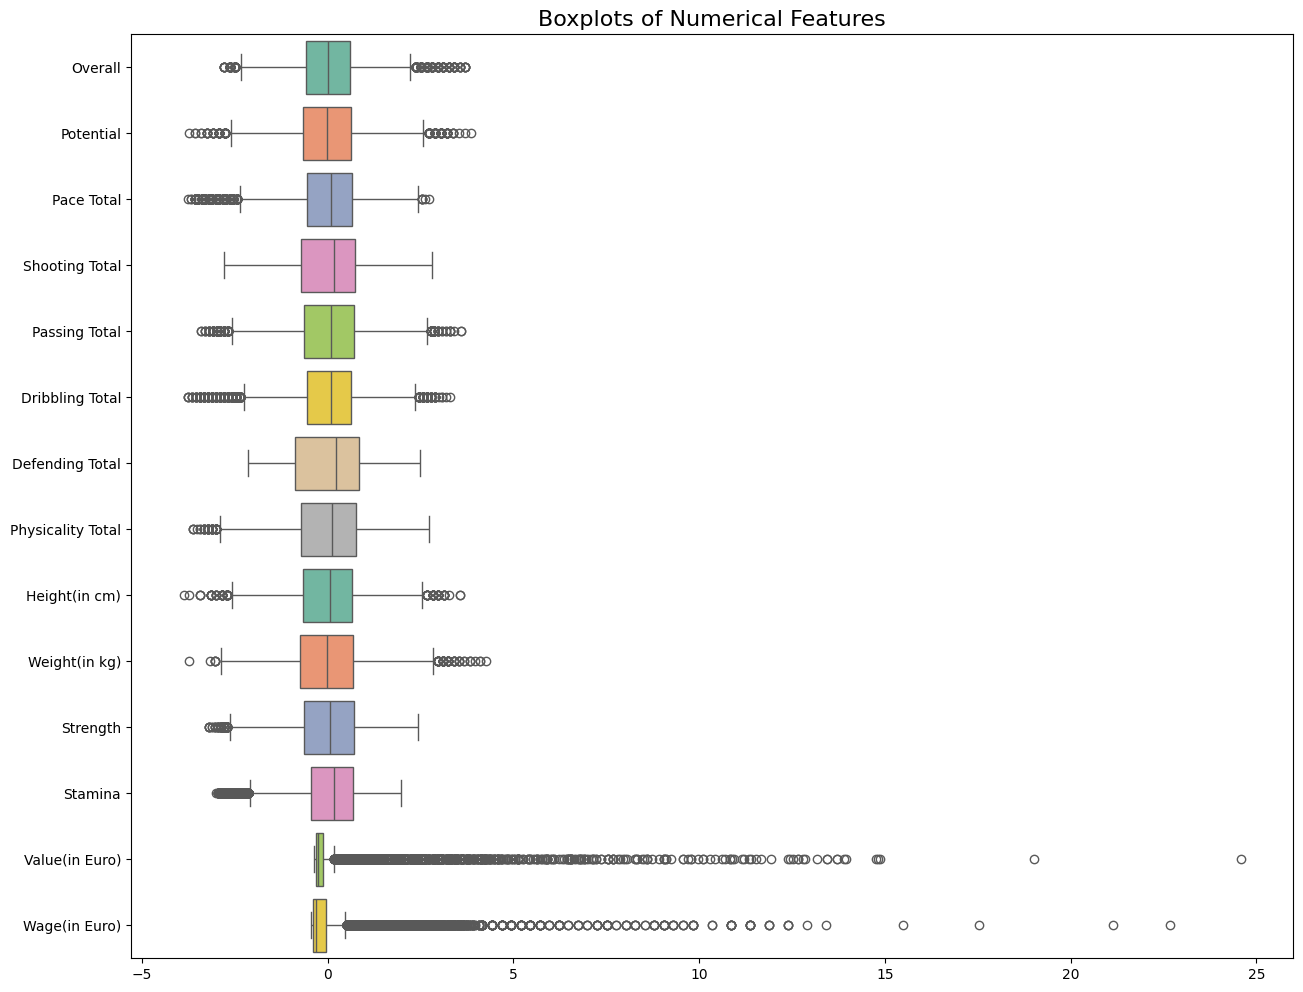

In [20]:
# Boxplots for detecting outliers
plt.figure(figsize = (15, 12))
sns.boxplot(data = data[numerical_features], orient = 'h', palette = 'Set2')
plt.title('Boxplots of Numerical Features', fontsize = 16)
plt.show()

In [21]:
# Function for detecting and removing outliers
def remove_outliers(df, features):
    for feature in features:
        Q1 = df[feature].quantile(0.25)  # 25th percentile
        Q3 = df[feature].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1  # Interquartile Range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Removing outliers
        df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    
    return df

In [22]:
# Removing outliers from numerical features
df_no_outliers = remove_outliers(data, numerical_features)

In [23]:
# Comparing the data before and after outlier removal
print(f"Original Dataset Shape: {data.shape}")
print(f"Dataset Shape After Removing Outliers: {df_no_outliers.shape}")

Original Dataset Shape: (18539, 851)
Dataset Shape After Removing Outliers: (12834, 851)


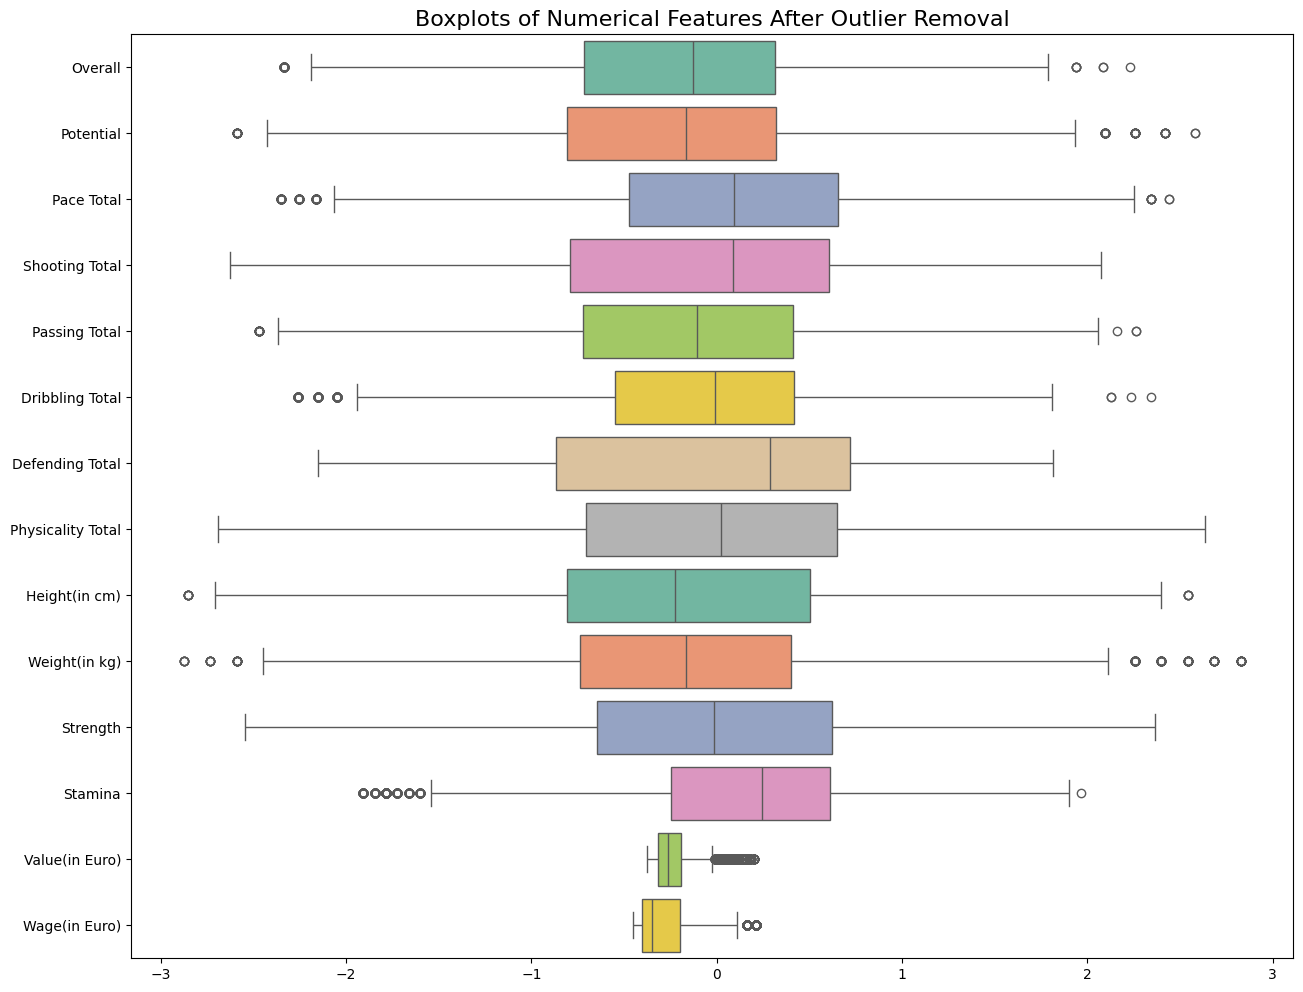

In [24]:
# Plot Boxplots After Outlier Removal
plt.figure(figsize = (15, 12))
sns.boxplot(data = df_no_outliers[numerical_features], orient = 'h', palette = 'Set2')
plt.title('Boxplots of Numerical Features After Outlier Removal', fontsize = 16)
plt.show()

<b style = "color : #FF7F50; font-family : 'Kristi', cursive; font-size : 15px"> Explaination </b>

<b style = "color : #08E8DE; font-family : 'Allura', cursive; font-size : 15px">
<ol>
    <li> Outlier Detection: </li> 
    <b style = "color : #6495ED">
    <ul>
        <li> The remove_outliers function calculates 𝑄1,𝑄3, and the IQR for each numerical feature. </li>
        <li> It then filters out rows where the feature value lies outside the acceptable range. </li>
    </ul>
    </b>
    <li> Outlier Removal: </li> 
    <b style = "color : #6495ED">
    <ul>
        <li> Rows with outlier values in any feature are removed from the dataset. </li>
    </ul>
    </b>
    <li> Post-removal Visualization: </li> 
    <b style = "color : #6495ED">
    <ul>
        <li> The boxplot after removal ensures that extreme values no longer skew the distribution. </li>
    </ul>
    </b>
</ol>
</b>

<b style = "color : #FF7F50; font-family : 'Kristi', cursive; font-size : 15px"> Insights </b>

<b style = "color : #08E8DE; font-family : 'Allura', cursive; font-size : 15px">
<ol>
    <li> Before Removal: </li> <b style = "color : #6495ED"> Financial features (Value(in Euro) and Wage(in Euro)) and some physical metrics (Weight(in kg)) often have extreme outliers. </b>
    <li> After Removal: </li> <b style = "color : #6495ED"> The dataset becomes cleaner, with more consistent ranges across features, making clustering more effective. </b>    
</ol>
</b>

In [25]:
# Copying the cleaned data
df = df_no_outliers.copy()

In [26]:
# Displaying few rows
df.head()

Overall  Potential  Pace Total  Shooting Total  Passing Total  \
334  2.231523   1.612113    1.031273        2.072185       2.055599   
438  2.084208   1.450633    0.937369        1.558216       1.643979   
447  2.084208   1.450633    1.312983        1.411368       1.232358   
525  1.936893   1.289152    0.749562        1.925337       1.026548   
548  1.936893   1.289152    1.125176        2.072185       1.026548   

     Dribbling Total  Defending Total  Physicality Total  Height(in cm)  \
334         1.809113         0.290300           1.902871       1.232031   
438         2.130439        -0.624776           1.798459       0.940397   
447         2.237548        -0.014726           1.694047       0.502946   
525         1.380678        -0.380756           1.694047       2.106933   
548         1.809113         0.473315           1.380811       0.648763   

     Weight(in kg)  ...  Club Name_Wuhan Three Towns  \
334       2.684302  ...                        False   
438       1.401045  ...                        False   
447       0.402956  ...                        False   
525       1.971382  ...                        False   
548       1.401045  ...                        False   

     Club Name_Wycombe Wanderers  Club Name_Yukatel Kayserispor  \
334                        False                          False   
438                        False                          False   
447                        False                          False   
525                        False                          False   
548                        False                          False   

     Club Name_Zagłębie Lubin  Club Name_Zhejiang Professional FC  \
334                     False                               False   
438                     False                               False   
447                     False                               False   
525                     False                               False   
548                     False                               False   

     Club Name_Ümraniyespor  Club Name_İstanbul Başakşehir FK  \
334                   False                             False   
438                   False                             False   
447                   False                             False   
525                   False                             False   
548                   False                             False   

     Club Name_İstanbulspor  Club Name_İttifak Holding Konyaspor  \
334                   False                                False   
438                   False                                False   
447                   False                                False   
525                   False                                False   
548                   False                                False   

     Club Name_Śląsk Wrocław  
334                    False  
438                    False  
447                    False  
525                    False  
548                    False  

[5 rows x 851 columns]

In [27]:
# Resetting the index 
df = df.reset_index(drop = True)

In [28]:
# Displaying few rows
df.head()

Overall  Potential  Pace Total  Shooting Total  Passing Total  \
0  2.231523   1.612113    1.031273        2.072185       2.055599   
1  2.084208   1.450633    0.937369        1.558216       1.643979   
2  2.084208   1.450633    1.312983        1.411368       1.232358   
3  1.936893   1.289152    0.749562        1.925337       1.026548   
4  1.936893   1.289152    1.125176        2.072185       1.026548   

   Dribbling Total  Defending Total  Physicality Total  Height(in cm)  \
0         1.809113         0.290300           1.902871       1.232031   
1         2.130439        -0.624776           1.798459       0.940397   
2         2.237548        -0.014726           1.694047       0.502946   
3         1.380678        -0.380756           1.694047       2.106933   
4         1.809113         0.473315           1.380811       0.648763   

   Weight(in kg)  ...  Club Name_Wuhan Three Towns  \
0       2.684302  ...                        False   
1       1.401045  ...                        False   
2       0.402956  ...                        False   
3       1.971382  ...                        False   
4       1.401045  ...                        False   

   Club Name_Wycombe Wanderers  Club Name_Yukatel Kayserispor  \
0                        False                          False   
1                        False                          False   
2                        False                          False   
3                        False                          False   
4                        False                          False   

   Club Name_Zagłębie Lubin  Club Name_Zhejiang Professional FC  \
0                     False                               False   
1                     False                               False   
2                     False                               False   
3                     False                               False   
4                     False                               False   

   Club Name_Ümraniyespor  Club Name_İstanbul Başakşehir FK  \
0                   False                             False   
1                   False                             False   
2                   False                             False   
3                   False                             False   
4                   False                             False   

   Club Name_İstanbulspor  Club Name_İttifak Holding Konyaspor  \
0                   False                                False   
1                   False                                False   
2                   False                                False   
3                   False                                False   
4                   False                                False   

   Club Name_Śląsk Wrocław  
0                    False  
1                    False  
2                    False  
3                    False  
4                    False  

[5 rows x 851 columns]

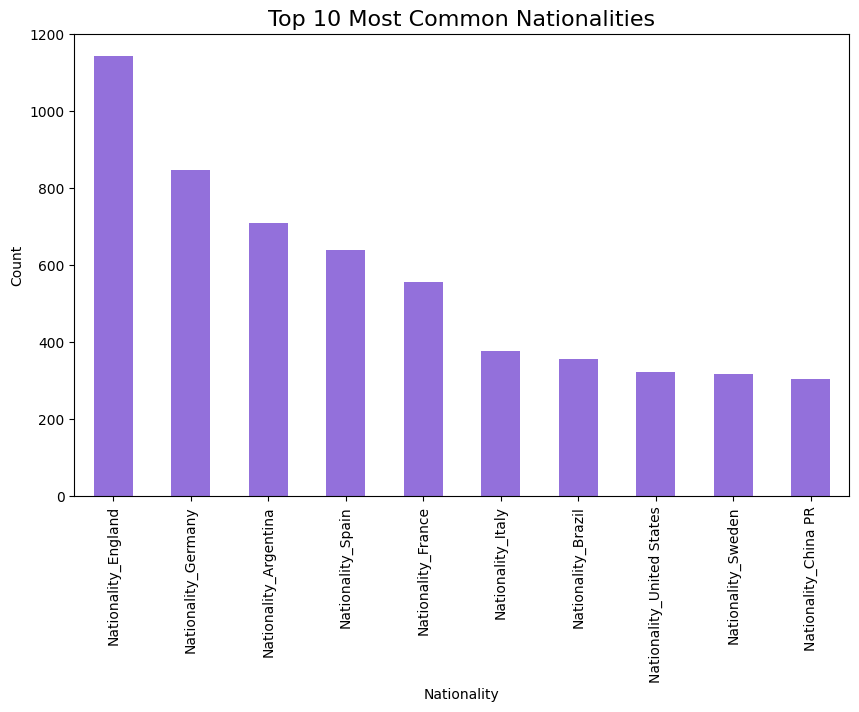

In [29]:
# Top 10 Most Common Nationalities
nationality_counts = df.filter(like = 'Nationality_').sum().sort_values(ascending = False).head(10)
plt.figure(figsize = (10, 6))
nationality_counts.plot(kind = 'bar', color = 'mediumpurple')
plt.title('Top 10 Most Common Nationalities', fontsize = 16)
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.show()

<b style = "color : #FF7F50; font-family : 'Kristi', cursive; font-size : 15px"> Insights </b>

<b style = "color : #08E8DE; font-family : 'Allura', cursive; font-size : 15px">
<ol>
    <li> Top Nationality: </li> <b style = "color : #6495ED"> England tops the list with approximately 1,100 counts. It signifies that English nationals are the most prevalent in the dataset. </b>
    <li> Prominent European Presence: </li> <b style = "color : #6495ED"> Germany, Spain, France, and Italy are all in the top 6, showcasing a strong European representation. </b>
    <li> South American Influence: </li> <b style = "color : #6495ED"> Argentina and Brazil, both prominent footballing nations, feature prominently with approximately 800 and 400 counts respectively. </b>
    <li> United States and China: </li> <b style = "color : #6495ED"> These two countries are also among the top 10, highlighting their growing influence in the context of the dataset. </b>
    <li> Diverse Representation: </li> <b style = "color : #6495ED"> The presence of countries from different continents (Europe, South America, North America, and Asia) indicates a diverse dataset in terms of nationalities. </b>
</ol>
</b>

<h3 style = "color : #FF7F50; font-family : 'Pacifico', cursive;"> Bivariate Analysis </h3>

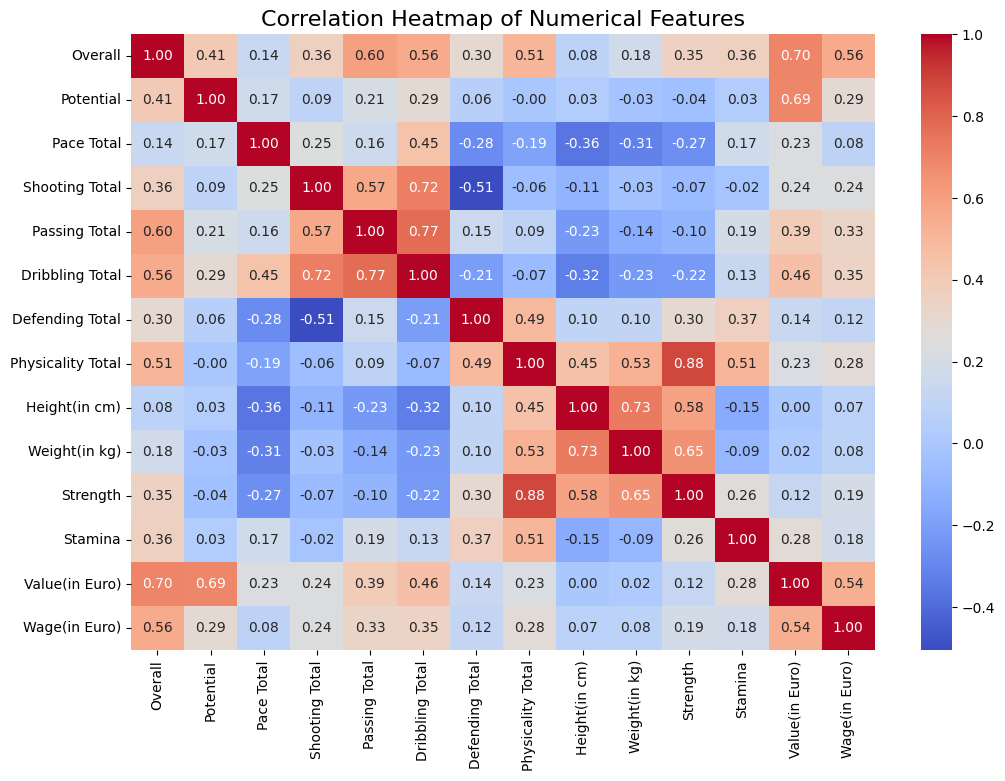

In [30]:
# Correlation Heatmap
plt.figure(figsize = (12, 8))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot = True, fmt = ".2f", cmap = 'coolwarm', cbar = True)
plt.title('Correlation Heatmap of Numerical Features', fontsize = 16)
plt.show()

<b style = "color : #FF7F50; font-family : 'Kristi', cursive; font-size : 15px"> Insights </b>

<b style = "color : #08E8DE; font-family : 'Allura', cursive; font-size : 15px">
<ol>
    <li> Overall and Value: </li> 
    <b style = "color : #6495ED">
        <ul> 
            <li> Strong Positive Correlation (0.70): </li>  <b style = "color : #89CFF0"> The player's overall rating is strongly positively correlated with their market value. This implies that higher-rated players generally have higher market values. </b>
        </ul>
    </b>
    <li> Potential and Value: </li> 
    <b style = "color : #6495ED">
        <ul> 
            <li> Moderate Positive Correlation (0.69): </li>  <b style = "color : #89CFF0"> A player's potential is positively correlated with their value. This indicates that players with higher potential tend to have higher market values. </b>
        </ul>
    </b>
    <li> Pace and Dribbling: </li> 
    <b style = "color : #6495ED">
        <ul> 
            <li> Moderate Positive Correlation (0.72): </li>  <b style = "color : #89CFF0"> Players with better pace tend to have better dribbling skills, indicating these attributes often go hand-in-hand. </b>
        </ul>
    </b>
    <li> Shooting and Passing: </li> 
    <b style = "color : #6495ED">
        <ul> 
            <li> Strong Positive Correlation (0.77): </li>  <b style = "color : #89CFF0"> Players who excel in shooting also tend to be good at passing, suggesting these skills are often linked. </b>
        </ul>
    </b>
    <li> Physicality and Strength: </li> 
    <b style = "color : #6495ED">
        <ul> 
            <li> Strong Positive Correlation (0.88): </li>  <b style = "color : #89CFF0"> Physicality is strongly correlated with strength, indicating that physically strong players are generally rated higher in terms of physical attributes. </b>
        </ul>
    </b>
    <li> Height and Weight: </li> 
    <b style = "color : #6495ED">
        <ul> 
            <li> Strong Positive Correlation (0.73): </li>  <b style = "color : #89CFF0"> Taller players tend to weigh more, as expected. </b>
        </ul>
    </b>
    <li> Value and Wage: </li> 
    <b style = "color : #6495ED">
        <ul> 
            <li> Moderate Positive Correlation (0.54): </li>  <b style = "color : #89CFF0"> There is a moderate positive correlation between a player's market value and their wage, indicating that higher-valued players generally earn higher wages. </b>
        </ul>
    </b>
</ol>
</b>

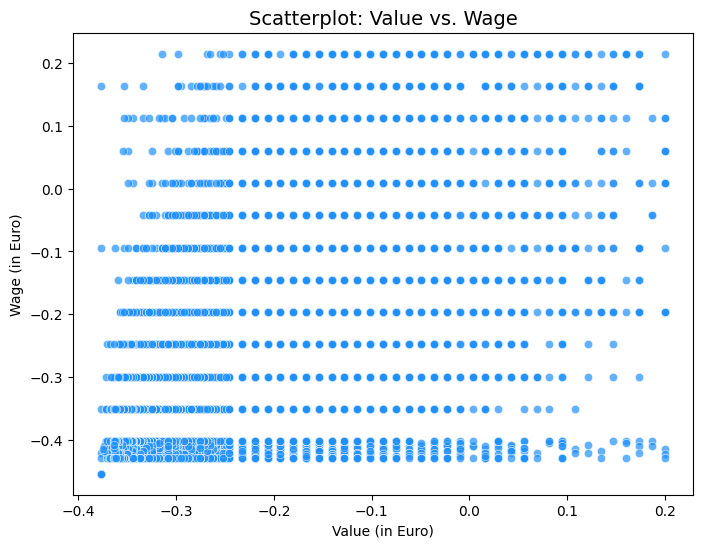

In [31]:
# Scatterplots (example: Wage vs. Value, Overall vs. Potential)
plt.figure(figsize = (8, 6))
sns.scatterplot(x = 'Value(in Euro)', y = 'Wage(in Euro)', data = df, alpha = 0.7, color = 'dodgerblue')
plt.title('Scatterplot: Value vs. Wage', fontsize = 14)
plt.xlabel('Value (in Euro)')
plt.ylabel('Wage (in Euro)')
plt.show()

<b style = "color : #FF7F50; font-family : 'Kristi', cursive; font-size : 15px"> Insights </b>

<b style = "color : #08E8DE; font-family : 'Allura', cursive; font-size : 15px">
<ol>
    <li> Clustering of Data Points: </li> <b style = "color : #89CFF0"> Most of the data points are clustered densely around specific Wage levels, particularly near the -0.4 Euro mark. </b>
    <li> Horizontal Patterns: </li> <b style = "color : #89CFF0"> There are clear horizontal lines formed by the clustering of points, suggesting that certain wage levels are more common or significant. </b>
    <li> Weak Correlation: </li> <b style = "color : #89CFF0"> The scatterplot does not show a strong linear relationship between Value and Wage, indicating a weak correlation between the two variables. </b>
    <li> Variability in Value: </li> <b style = "color : #89CFF0"> There is more variability in the Value axis compared to the Wage axis, implying that Value has a wider range of data points. </b>
</ol>
</b>

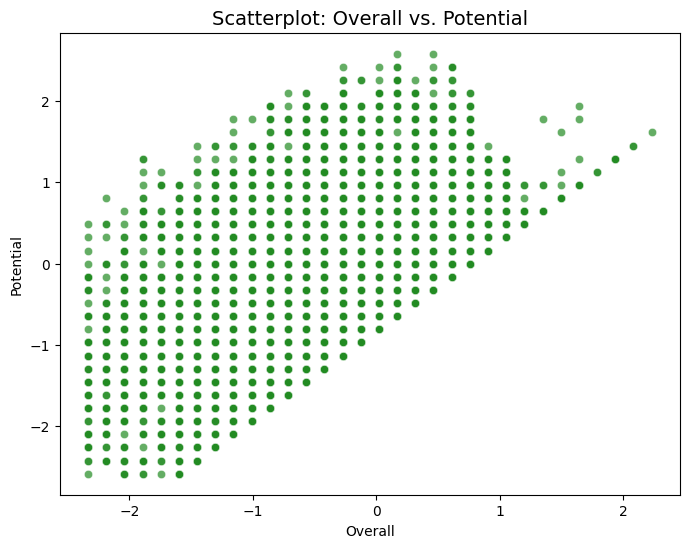

In [32]:
plt.figure(figsize = (8, 6))
sns.scatterplot(x = 'Overall', y = 'Potential', data = df, alpha = 0.7, color = 'forestgreen')
plt.title('Scatterplot: Overall vs. Potential', fontsize = 14)
plt.xlabel('Overall')
plt.ylabel('Potential')
plt.show()

<b style = "color : #FF7F50; font-family : 'Kristi', cursive; font-size : 15px"> Insights </b>

<b style = "color : #08E8DE; font-family : 'Allura', cursive; font-size : 15px">
<ol>
    <li> Positive Correlation: </li> <b style = "color : #89CFF0">The data points form a diagonal pattern from the bottom left to the top right, suggesting a positive correlation between the "Overall" and "Potential" variables. As the "Overall" value increases, the "Potential" value tends to increase as well. </b>
    <li> Data Concentration: </li> <b style = "color : #89CFF0"> The data points are densely packed in the center of the plot, indicating that most observations fall within a certain range for both variables. </b>
    <li> Outliers: </li> <b style = "color : #89CFF0"> There are a few data points spread out from the main cluster, which may represent outliers. These points could be interesting to investigate further to understand why they differ from the majority. </b>
    <li> Symmetry: </li> <b style = "color : #89CFF0"> The scatterplot appears to be relatively symmetrical, indicating a balanced distribution of the data points around the central diagonal. </b>
</ol>
</b>

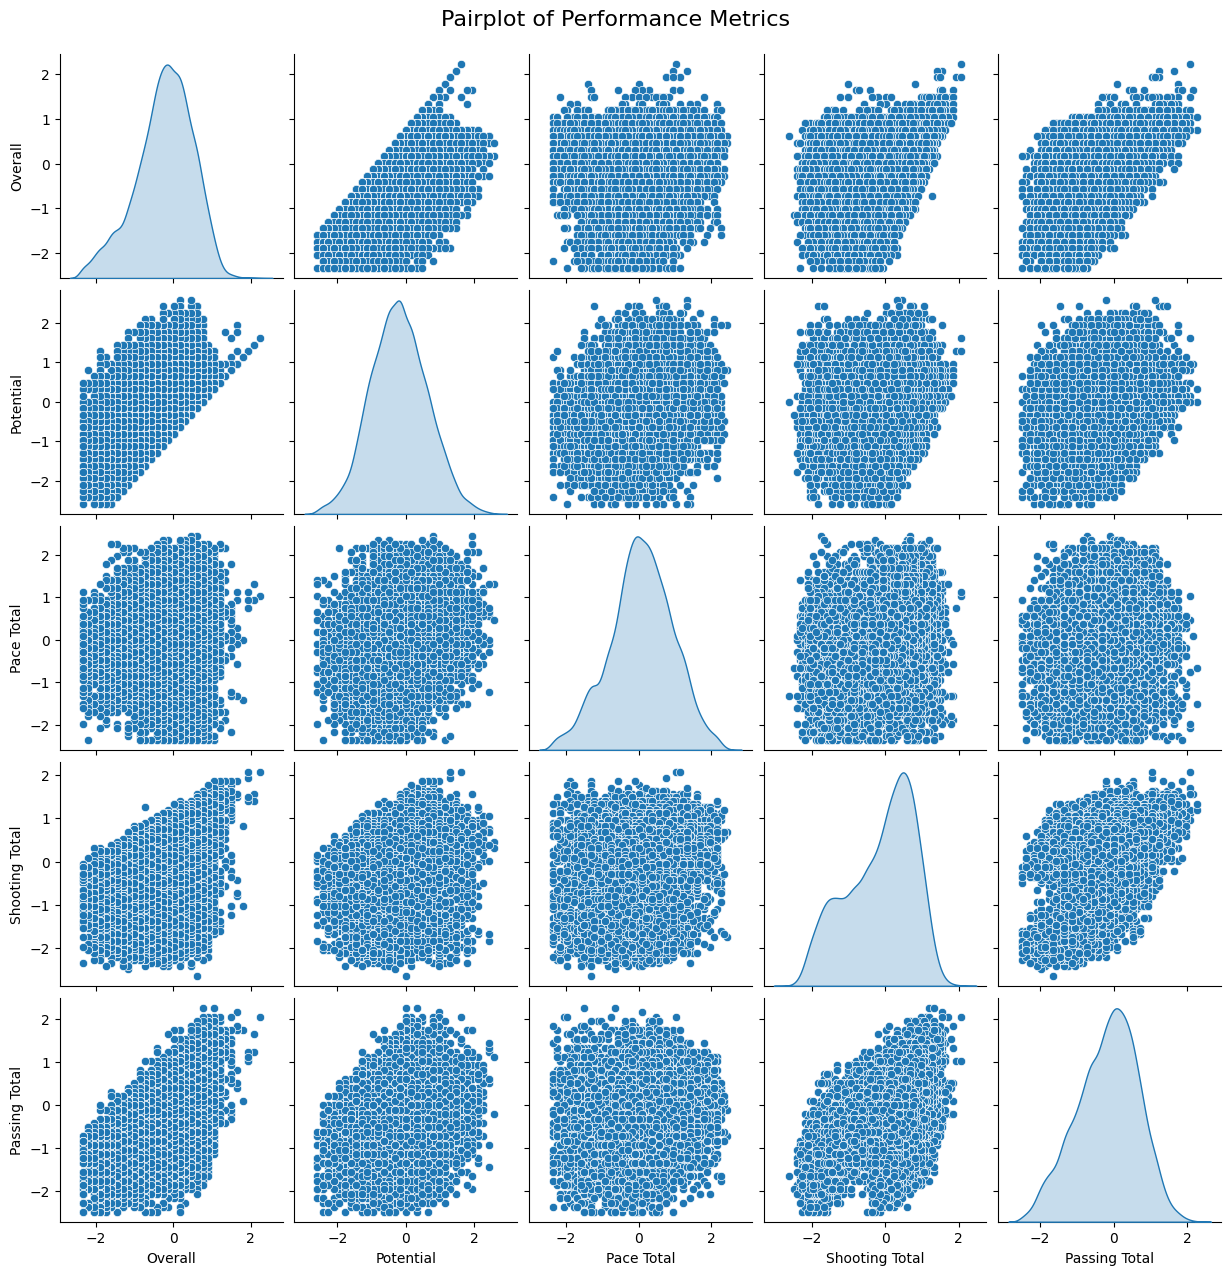

In [33]:
# Pairplot for Performance Metrics
performance_metrics = ['Overall', 'Potential', 'Pace Total', 'Shooting Total', 'Passing Total']
sns.pairplot(df[performance_metrics], diag_kind = 'kde', palette = 'husl')
plt.suptitle('Pairplot of Performance Metrics', y = 1.02, fontsize = 16)
plt.show()

<b style = "color : #FF7F50; font-family : 'Kristi', cursive; font-size : 15px"> Insights </b>

<b style = "color : #08E8DE; font-family : 'Allura', cursive; font-size : 15px">
<ol>
    <li> Overall vs. Potential: </li> <b style = "color : #89CFF0"> There is a strong positive linear relationship between Overall and Potential, indicating that players with higher potential tend to have higher overall performance. </b>
    <li> Overall vs. Pace Total: </li> <b style = "color : #89CFF0"> The scatter plot shows a more dispersed relationship, suggesting that Pace Total does not have a strong correlation with Overall performance. </b>
    <li> Overall vs. Shooting Total: </li> <b style = "color : #89CFF0"> There is a moderate positive correlation, indicating that players with higher shooting totals tend to have higher overall performance. </b>
    <li> Overall vs. Passing Total: </li> <b style = "color : #89CFF0"> There is a moderate positive correlation, indicating that players with higher passing totals tend to have higher overall performance. </b>
    <li> Potential vs. Pace Total: </li> <b style = "color : #89CFF0"> The scatter plot shows a dispersed relationship, suggesting that Pace Total does not have a strong correlation with Potential. </b>
    <li> Potential vs. Shooting Total: </li> <b style = "color : #89CFF0"> There is a moderate positive correlation, indicating that players with higher shooting totals tend to have higher potential. </b>
    <li> Potential vs. Passing Total: </li> <b style = "color : #89CFF0"> There is a moderate positive correlation, indicating that players with higher passing totals tend to have higher potential. </b>
    <li> Pace Total vs. Shooting Total: </li> <b style = "color : #89CFF0"> The scatter plot shows a dispersed relationship, suggesting that Pace Total does not have a strong correlation with Shooting Total. </b>
    <li> Pace Total vs. Passing Total: </li> <b style = "color : #89CFF0"> The scatter plot shows a dispersed relationship, suggesting that Pace Total does not have a strong correlation with Passing Total. </b>
    <li> Shooting Total vs. Passing Total: </li> <b style = "color : #89CFF0"> There is a moderate positive correlation, indicating that players with higher shooting totals tend to have higher passing totals. </b>
</ol>
</b>

<h3 style = "color : #FF7F50; font-family : 'Pacifico', cursive;"> Dimensionality Reduction </h3>

<b style = "color : #007BA7; font-family : 'Pacifico', cursive; font-size : 17px"> 1. Principal Component Analysis (PCA): </b>

In [34]:
from sklearn.decomposition import PCA

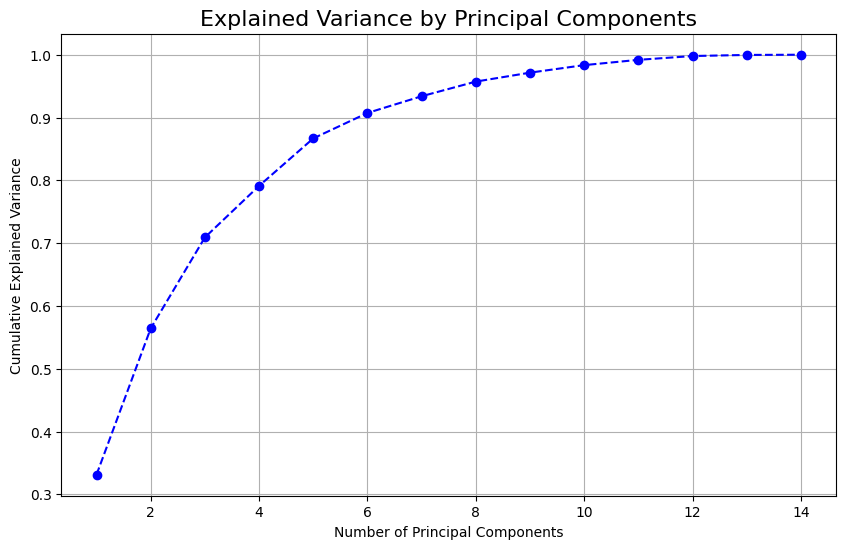

In [35]:
# PCA Implementation
pca = PCA()
pca_result = pca.fit_transform(df[numerical_features])

# Explained Variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# Plotting Explained Variance
plt.figure(figsize = (10, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker = 'o', linestyle = '--', color = 'b')
plt.title('Explained Variance by Principal Components', fontsize = 16)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

In [36]:
# Determining number of components to retain (e.g., 90% variance)
num_components = (cumulative_variance >= 0.90).argmax() + 1
print(f"Number of components to retain 90% variance: {num_components}")

# Applying PCA with optimal components
pca_optimal = PCA(n_components=num_components)
reduced_data = pca_optimal.fit_transform(df[numerical_features])

# Adding PCA components back to the dataset for clustering
for i in range(1, num_components + 1):
    df[f'PCA{i}'] = reduced_data[:, i - 1]

Number of components to retain 90% variance: 6


<b style = "color : #007BA7; font-family : 'Pacifico', cursive; font-size : 17px"> 2. t-SNE for Visualization: </b>

In [37]:
from sklearn.manifold import TSNE

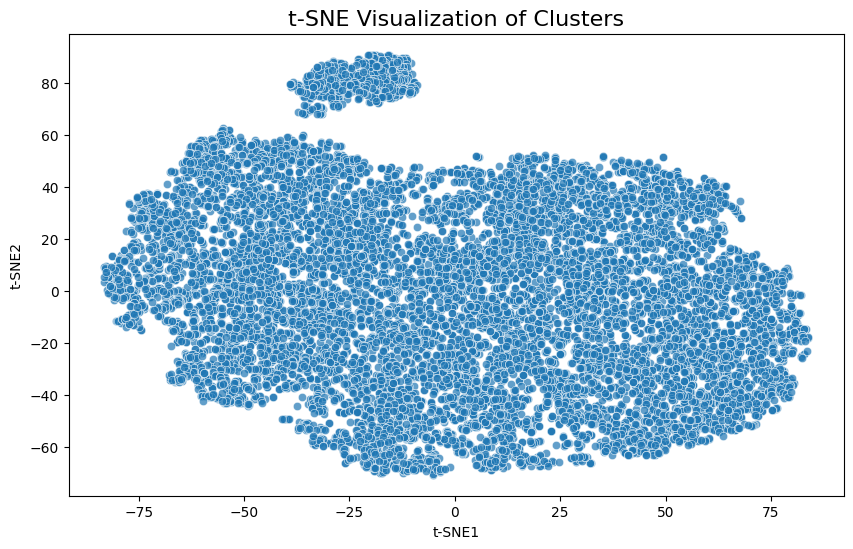

In [38]:
# t-SNE Implementation
tsne = TSNE(n_components = 2, random_state = 42, perplexity = 30, n_iter = 1000)
tsne_result = tsne.fit_transform(df[numerical_features])

# Adding t-SNE components to the dataset for visualization
df['t-SNE1'] = tsne_result[:, 0]
df['t-SNE2'] = tsne_result[:, 1]

# Scatterplot for t-SNE Results
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 't-SNE1', y = 't-SNE2', data = df, alpha = 0.7, palette = 'viridis')
plt.title('t-SNE Visualization of Clusters', fontsize = 16)
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.show()

<b style = "color : #FF7F50; font-family : 'Kristi', cursive; font-size : 15px"> Explaination </b>

<b style = "color : #08E8DE; font-family : 'Allura', cursive; font-size : 15px">
<ol>
    <li> PCA: </li> 
    <b style = "color : #6495ED">
    <ul>
        <li> Calculates the explained variance for each principal component. </li>
        <li> Helps reduce dimensions while retaining most of the variance in the data. </li>
        <li> Adds PCA1, PCA2, ... back into the dataset for clustering. </li>
    </ul>
    </b>
    <li> t-SNE: </li> 
    <b style = "color : #6495ED">
    <ul>
        <li> Focuses on local structure (similarities between points) for better visualization in 2D space. </li>
        <li> Provides insights into potential clustering patterns. </li>
    </ul>
</ol>
</b>

<b style = "color : #FF7F50; font-family : 'Kristi', cursive; font-size : 15px"> Insights </b>

<b style = "color : #08E8DE; font-family : 'Allura', cursive; font-size : 15px">
<ol>
    <li> Cumulative Explained Variance Plot: </li> <b style = "color : #6495ED"> The cumulative explained variance plot determines the number of PCA components to retain (e.g., if 5 components capture 90% variance, we use those). </b>
    <li> t-SNE Scatterplot: </li> <b style = "color : #6495ED"> Helps visualize clusters or separations in the data. Points closer together are more similar. </b>    
</ol>
</b>

<h2 style = "color : #6495ED; font-family : 'Pacifico', cursive;"> Clustering Analysis </h2>

<h3 style = "color : #318CE7; font-family : 'Pacifico', cursive;"> 1. KMeans Clustering </h3>

In [39]:
# Importing libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [40]:
# Using the PCA-reduced data
reduced_data = df[[f'PCA{i}' for i in range(1, num_components + 1)]]

In [41]:
# Displaying few rows of data
reduced_data.head()

PCA1      PCA2      PCA3      PCA4      PCA5      PCA6
0  1.835821  4.779430 -2.614218  1.993362  0.032844  1.587626
1  0.791891  4.242317 -2.277890  1.503913  0.277286  0.857155
2 -0.126584  3.964749 -1.274601  1.575763  0.431951  0.962831
3  1.799653  3.700043 -2.917044  1.605356  0.394290  0.965555
4  1.176747  4.044491 -1.918585  1.280411  0.285675  0.919072

In [42]:
# Determining the Optimal Clusters Using Elbow Method
inertia = []
sil_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(reduced_data)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(reduced_data, kmeans.labels_))

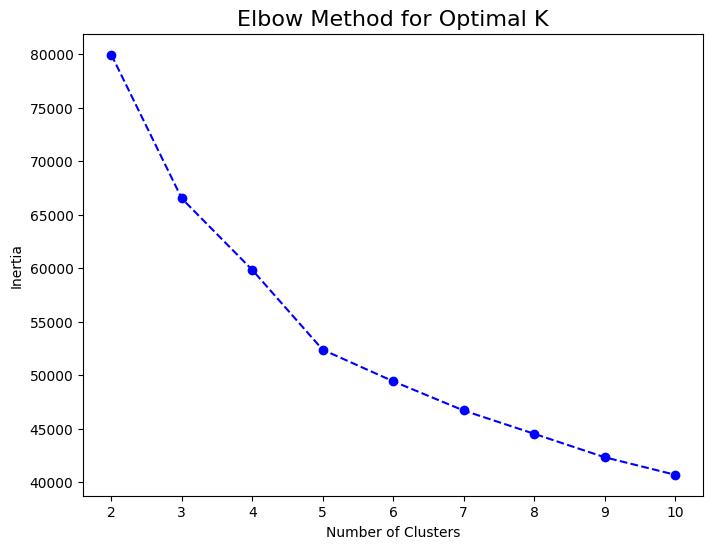

In [43]:
# Plotting Elbow Method
plt.figure(figsize = (8, 6))
plt.plot(k_range, inertia, marker = 'o', linestyle = '--', color = 'b')
plt.title('Elbow Method for Optimal K', fontsize = 16)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

<b style = "color : #FF7F50; font-family : 'Kristi', cursive; font-size : 15px"> Insights </b>

<b style = "color : #08E8DE; font-family : 'Allura', cursive; font-size : 15px">
<ol>
    <li> Number of Clusters: </li> <b style = "color : #6495ED"> The x-axis shows the number of clusters, ranging from 2 to 10. </b>
    <li> Inertia: </li> <b style = "color : #6495ED"> The y-axis represents inertia, which is the sum of squared distances of samples to their closest cluster center. Lower inertia generally indicates better clustering. </b>
    <li> Elbow Point: </li> <b style = "color : #6495ED"> The plot shows a blue dashed line with data points. As the number of clusters increases, inertia decreases. The "elbow" point is where the rate of decrease sharply changes, forming an angle. This point suggests the optimal number of clusters. </b>
</ol>
</b>

<b style = "color : #72A0C1"> From this graph, it appears that the elbow point is around 3 to 4 clusters, which means that using 3 or 4 clusters would be ideal for this dataset. This is because adding more clusters beyond this point results in diminishing returns in terms of reducing inertia. </b>

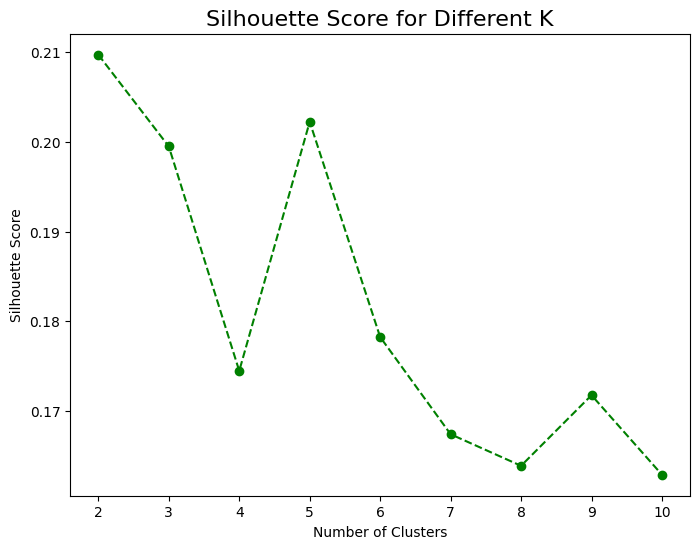

In [44]:
# Plotting Silhouette Scores
plt.figure(figsize = (8, 6))
plt.plot(k_range, sil_scores, marker = 'o', linestyle = '--', color = 'g')
plt.title('Silhouette Score for Different K', fontsize = 16)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

<b style = "color : #FF7F50; font-family : 'Kristi', cursive; font-size : 15px"> Insights </b>

<b style = "color : #08E8DE; font-family : 'Allura', cursive; font-size : 15px">
<ol>
    <li> Best K Values: </li> <b style = "color : #6495ED"> The highest silhouette scores are at K=2 and K=5, both around 0.21, suggesting that these numbers of clusters may be optimal for your data. </b>
    <li> Decreasing Scores: </li> <b style = "color : #6495ED"> As the number of clusters increases beyond 5, the silhouette scores generally decrease, indicating diminishing clustering quality. </b>
    <li> Conclusion: </li> <b style = "color : #6495ED"> The optimal number of clusters for your dataset is likely 2 or 5, as these values have the highest silhouette scores, meaning better-defined clusters. </b>
</ol>
</b>

In [45]:
# Fitting KMeans with Optimal Clusters
optimal_k = sil_scores.index(max(sil_scores)) + 2
print(f"Optimal Number of Clusters: {optimal_k}")

kmeans = KMeans(n_clusters = optimal_k, random_state = 42)
df['KMeans_Cluster'] = kmeans.fit_predict(reduced_data)

Optimal Number of Clusters: 2


In [46]:
# Evaluating KMeans Clustering
print(f"Silhouette Score for KMeans: {silhouette_score(reduced_data, df['KMeans_Cluster']).round(2)}")

Silhouette Score for KMeans: 0.21


<h3 style = "color : #318CE7; font-family : 'Pacifico', cursive;"> 2. Hierarchical Clustering </h3>

In [47]:
# Importing Libraries
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

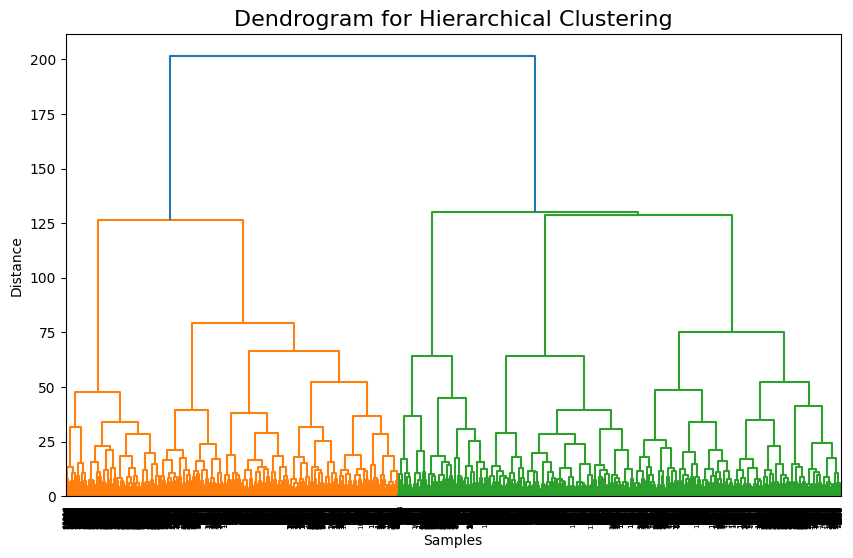

In [48]:
# Visualizing Dendrogram
plt.figure(figsize = (10, 6))
linkage_matrix = linkage(reduced_data, method = 'ward')  # Ward's method minimizes variance
dendrogram(linkage_matrix)
plt.title('Dendrogram for Hierarchical Clustering', fontsize = 16)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [49]:
# Choosing number of clusters based on the dendrogram
num_clusters_hc = 4  # Example from dendrogram visualization

# Fitting Agglomerative Clustering
agglo_clustering = AgglomerativeClustering(n_clusters = num_clusters_hc, metric = 'euclidean', linkage = 'ward')
df['HC_Cluster'] = agglo_clustering.fit_predict(reduced_data)

In [50]:
# Evaluating Hierarchical Clustering
sil_hc = silhouette_score(reduced_data, df['HC_Cluster'])
print(f"Silhouette Score for Hierarchical Clustering: {(sil_hc).round(2)}")

Silhouette Score for Hierarchical Clustering: 0.13


<h3 style = "color : #318CE7; font-family : 'Pacifico', cursive;"> 3. DBSCAN Clustering </h3>

In [51]:
# Importing Libraries
from sklearn.cluster import DBSCAN

In [52]:
# Experiment with different eps and min_samples
eps_values = [0.5, 1.0, 1.5]
min_samples_values = [5, 10, 20]

best_sil_score = -1
best_params = {}

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps = eps, min_samples = min_samples)
        dbscan_labels = dbscan.fit_predict(reduced_data)
        
        # Only calculating Silhouette Score if there are more than 1 cluster
        if len(set(dbscan_labels)) > 1:
            sil_score = silhouette_score(reduced_data, dbscan_labels)
            if sil_score > best_sil_score:
                best_sil_score = sil_score
                best_params = {'eps': eps, 'min_samples': min_samples}

# Displaying the best parameters and Silhouette Score
print(f"Best DBSCAN Parameters: {best_params}")
print(f"Best Silhouette Score for DBSCAN: {best_sil_score}")

# Fitting DBSCAN with Best Parameters
dbscan = DBSCAN(eps = best_params['eps'], min_samples = best_params['min_samples'])
df['DBSCAN_Cluster'] = dbscan.fit_predict(reduced_data)

Best DBSCAN Parameters: {'eps': 1.5, 'min_samples': 10}
Best Silhouette Score for DBSCAN: 0.2814367103177772


<h2 style = "color : #6495ED; font-family : 'Pacifico', cursive;"> Cluster Profiling </h2>

<h3 style = "color : #318CE7; font-family : 'Pacifico', cursive;"> 1. Summarizing Clusters </h3>

In [53]:
# Defining key features for profiling
profile_features = [
    'Overall', 'Potential', 'Pace Total', 'Shooting Total', 'Passing Total',
    'Dribbling Total', 'Defending Total', 'Physicality Total',
    'Height(in cm)', 'Weight(in kg)', 'Strength', 'Stamina',
    'Value(in Euro)', 'Wage(in Euro)'
]

# Summarizing clusters for KMeans
kmeans_summary = df.groupby('KMeans_Cluster')[profile_features].mean()

# Summarizing clusters for Hierarchical Clustering
hc_summary = df.groupby('HC_Cluster')[profile_features].mean()

# Summarizing clusters for DBSCAN (ignore noise cluster -1 if present)
if -1 in df['DBSCAN_Cluster'].unique():
    dbscan_summary = df[df['DBSCAN_Cluster'] != -1].groupby('DBSCAN_Cluster')[profile_features].mean()
else:
    dbscan_summary = df.groupby('DBSCAN_Cluster')[profile_features].mean()

In [54]:
print("KMeans Cluster Summary:")
kmeans_summary

KMeans Cluster Summary:


Overall  Potential  Pace Total  Shooting Total  \
KMeans_Cluster                                                    
0              -0.056097  -0.234633   -0.253115       -0.317629   
1              -0.409979  -0.177786    0.384601        0.054114   

                Passing Total  Dribbling Total  Defending Total  \
KMeans_Cluster                                                    
0                   -0.262677         -0.35339         0.339041   
1                   -0.078099          0.09913        -0.395501   

                Physicality Total  Height(in cm)  Weight(in kg)  Strength  \
KMeans_Cluster                                                              
0                        0.561202       0.446069       0.457950  0.639108   
1                       -0.745891      -0.715558      -0.712053 -0.716614   

                 Stamina  Value(in Euro)  Wage(in Euro)  
KMeans_Cluster                                           
0               0.266188       -0.232485      -0.270122  
1               0.021652       -0.242463      -0.306221

In [55]:
print("\nHierarchical Clustering Cluster Summary:")
hc_summary


Hierarchical Clustering Cluster Summary:


Overall  Potential  Pace Total  Shooting Total  Passing Total  \
HC_Cluster                                                                   
0          -0.476632  -0.194206    0.334451        0.086789      -0.133287   
1          -0.227493  -0.214723   -0.385385       -1.022842      -0.612648   
2          -0.143823  -0.301082   -0.114226        0.731182      -0.340689   
3           0.262473  -0.162153    0.204061        0.094323       0.481065   

            Dribbling Total  Defending Total  Physicality Total  \
HC_Cluster                                                        
0                  0.060060        -0.550133          -0.837964   
1                 -0.797030         0.730346           0.478739   
2                  0.025914        -1.033327           0.294581   
3                  0.301112         0.720131           0.563832   

            Height(in cm)  Weight(in kg)  Strength   Stamina  Value(in Euro)  \
HC_Cluster                                                                     
0               -0.645756      -0.651043 -0.725174 -0.079256       -0.246223   
1                0.452350       0.376133  0.579982  0.258721       -0.246773   
2                0.864921       0.900059  0.597588 -0.424751       -0.248146   
3               -0.424328      -0.284537  0.257220  0.849497       -0.197449   

            Wage(in Euro)  
HC_Cluster                 
0               -0.307689  
1               -0.304420  
2               -0.271535  
3               -0.230648

In [56]:
print("\nDBSCAN Cluster Summary:")
dbscan_summary


DBSCAN Cluster Summary:


Overall  Potential  Pace Total  Shooting Total  \
DBSCAN_Cluster                                                    
0              -0.232707  -0.206356    0.066124       -0.131753   

                Passing Total  Dribbling Total  Defending Total  \
DBSCAN_Cluster                                                    
0                   -0.170025         -0.12678        -0.027807   

                Physicality Total  Height(in cm)  Weight(in kg)  Strength  \
DBSCAN_Cluster                                                              
0                       -0.091958      -0.135009       -0.12733 -0.038745   

                 Stamina  Value(in Euro)  Wage(in Euro)  
DBSCAN_Cluster                                           
0               0.144545       -0.237471      -0.288142

<h3 style = "color : #318CE7; font-family : 'Pacifico', cursive;"> 2. Visualizing Cluster Distributions </h3>

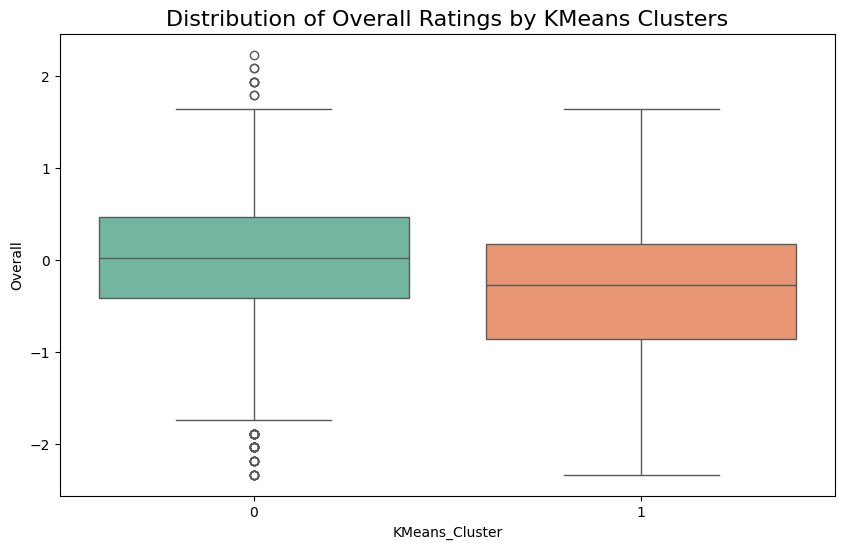

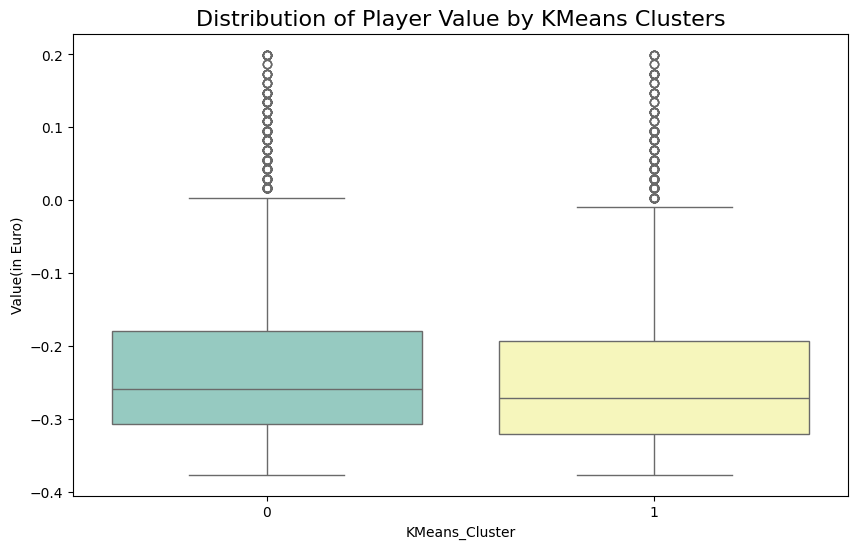

In [57]:
# Visualizing KMeans Clusters (example: Overall, Value)
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'KMeans_Cluster', y = 'Overall', data = df, palette = 'Set2')
plt.title('Distribution of Overall Ratings by KMeans Clusters', fontsize = 16)
plt.show()

plt.figure(figsize = (10, 6))
sns.boxplot(x = 'KMeans_Cluster', y = 'Value(in Euro)', data = df, palette = 'Set3')
plt.title('Distribution of Player Value by KMeans Clusters', fontsize = 16)
plt.show()

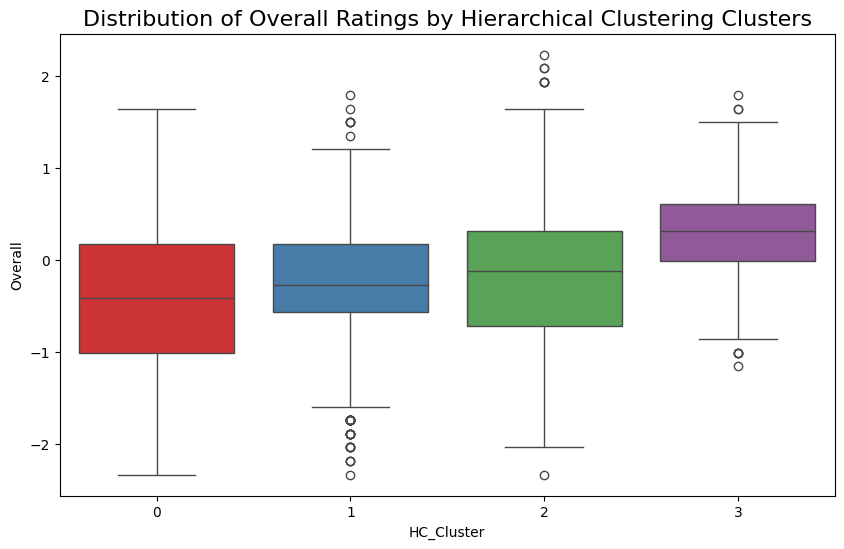

In [58]:
# Visualizing Hierarchical Clustering Clusters
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'HC_Cluster', y = 'Overall', data = df, palette = 'Set1')
plt.title('Distribution of Overall Ratings by Hierarchical Clustering Clusters', fontsize = 16)
plt.show()

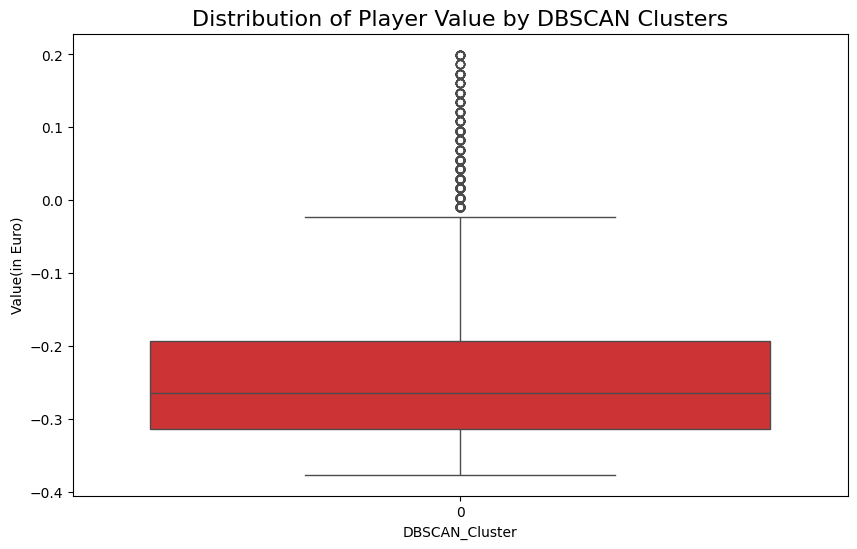

In [59]:
# Visualizing DBSCAN Clusters
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'DBSCAN_Cluster', y = 'Value(in Euro)', data = df[df['DBSCAN_Cluster'] != -1], palette = 'Set1')
plt.title('Distribution of Player Value by DBSCAN Clusters', fontsize = 16)
plt.show()

<h3 style = "color : #318CE7; font-family : 'Pacifico', cursive;"> 3. Comparing Cluster Labels </h3>

In [60]:
# Comparing KMeans vs. Hierarchical Clustering
comparison_kmeans_hc = pd.crosstab(df['KMeans_Cluster'], df['HC_Cluster'])
print("KMeans vs Hierarchical Clustering:")
print(comparison_kmeans_hc)

KMeans vs Hierarchical Clustering:
HC_Cluster         0     1     2     3
KMeans_Cluster                        
0                539  3116  1270  1492
1               4972   302   235   908


In [61]:
# Comparing KMeans vs. DBSCAN
comparison_kmeans_dbscan = pd.crosstab(df['KMeans_Cluster'], df['DBSCAN_Cluster'])
print("\nKMeans vs DBSCAN:")
print(comparison_kmeans_dbscan)


KMeans vs DBSCAN:
DBSCAN_Cluster  -1     0
KMeans_Cluster          
0                9  6408
1                5  6412


<b style = "color : #FF7F50; font-family : 'Kristi', cursive; font-size : 15px"> Insights </b>

<b style = "color : #08E8DE; font-family : 'Allura', cursive; font-size : 15px">
<ol>
    <li> Cluster Characteristics: </li> 
    <b style = "color : #6495ED"> 
    <ul>
        <li> Average values for features like Overall, Potential, and Value(in Euro) help identify cluster profiles. </li>
        <li> For example, one cluster might represent high-value, high-overall players, while another might represent younger, lower-overall players. </li>
    </ul>
    </b>
    <li> Distribution Visualization: </li>
    <b style = "color : #6495ED"> 
    <ul>
        <li> Boxplots reveal variations in features across clusters. </li>
        <li> For instance, one cluster might have players with high Strength but low Pace. </li>
    </ul>
    </b>
    <li> Comparison of Clustering Algorithms: </li>
    <b style = "color : #6495ED"> 
    <ul>
        <li> Cross-tabulations help compare the similarity between clusters formed by different algorithms. </li>
        <li> Algorithms like DBSCAN may have noise clusters (-1), which can represent outliers. </li>
    </ul>
    </b>
</ol>
</b>

In [62]:
# Function for summarizing clusters
def summarize_clusters(df, cluster_column, features):
    return df.groupby(cluster_column)[features].agg(['mean', 'median', 'std', 'count'])


In [63]:
# Summarizing KMeans Clusters
kmeans_profile = summarize_clusters(df, 'KMeans_Cluster', profile_features)
print("KMeans Cluster Profiles:\n")
print(kmeans_profile)

KMeans Cluster Profiles:

                 Overall                           Potential            \
                    mean    median       std count      mean    median   
KMeans_Cluster                                                           
0              -0.056097  0.021797  0.636962  6417 -0.234633 -0.325652   
1              -0.409979 -0.272834  0.768648  6417 -0.177786 -0.164172   

                               Pace Total            ...   Stamina        \
                     std count       mean    median  ...       std count   
KMeans_Cluster                                       ...                   
0               0.774450  6417  -0.253115 -0.189474  ...  0.756732  6417   
1               0.879357  6417   0.384601  0.373948  ...  0.700540  6417   

               Value(in Euro)                           Wage(in Euro)  \
                         mean    median       std count          mean   
KMeans_Cluster                                                          
0  

In [64]:
# Summarizing Hierarchical Clusters
hc_profile = summarize_clusters(df, 'HC_Cluster', profile_features)
print("\nHierarchical Clustering Profiles:\n", hc_profile)


Hierarchical Clustering Profiles:
              Overall                           Potential                      \
                mean    median       std count      mean    median       std   
HC_Cluster                                                                     
0          -0.476632 -0.420149  0.795188  5511 -0.194206 -0.164172  0.898739   
1          -0.227493 -0.272834  0.572489  3418 -0.214723 -0.164172  0.823063   
2          -0.143823 -0.125519  0.720531  1505 -0.301082 -0.325652  0.795942   
3           0.262473  0.316427  0.448428  2400 -0.162153 -0.164172  0.671690   

                 Pace Total            ...   Stamina       Value(in Euro)  \
           count       mean    median  ...       std count           mean   
HC_Cluster                             ...                                  
0           5511   0.334451  0.280044  ...  0.646100  5511      -0.246223   
1           3418  -0.385385 -0.377281  ...  0.539091  3418      -0.246773   
2           1505  

In [65]:
# Summarizing DBSCAN Clusters (ignore noise cluster -1)
if -1 in df['DBSCAN_Cluster'].unique():
    dbscan_profile = summarize_clusters(df[df['DBSCAN_Cluster'] != -1], 'DBSCAN_Cluster', profile_features)
else:
    dbscan_profile = summarize_clusters(df, 'DBSCAN_Cluster', profile_features)

print("\nDBSCAN Cluster Profiles:\n", dbscan_profile)


DBSCAN Cluster Profiles:
                  Overall                            Potential            \
                    mean    median       std  count      mean    median   
DBSCAN_Cluster                                                            
0              -0.232707 -0.125519  0.726739  12820 -0.206356 -0.164172   

                                Pace Total            ...   Stamina         \
                     std  count       mean    median  ...       std  count   
DBSCAN_Cluster                                        ...                    
0               0.827731  12820   0.066124  0.092237  ...  0.738597  12820   

               Value(in Euro)                            Wage(in Euro)  \
                         mean    median       std  count          mean   
DBSCAN_Cluster                                                           
0                   -0.237471 -0.265289  0.104893  12820     -0.288142   

                                           
                  

<h3 style = "color : #318CE7; font-family : 'Pacifico', cursive;"> 4. Feature Distributions Across Clusters </h3>

<b style = "color : #A1CAF1; font-family : 'Pacifico', cursive;"> We'll creating visualizations for key features like Overall, Value(in Euro), and Pace Total for each clustering algorithm. </b>

In [66]:
# Function for creating boxplots for feature distributions
def plot_cluster_distributions(df, cluster_column, feature, title, palette = "Set2"):
    plt.figure(figsize = (10, 6))
    sns.boxplot(x = cluster_column, y = feature, data = df, palette = palette)
    plt.title(f'{title} by {cluster_column}', fontsize = 16)
    plt.xlabel(cluster_column)
    plt.ylabel(feature)
    plt.show()

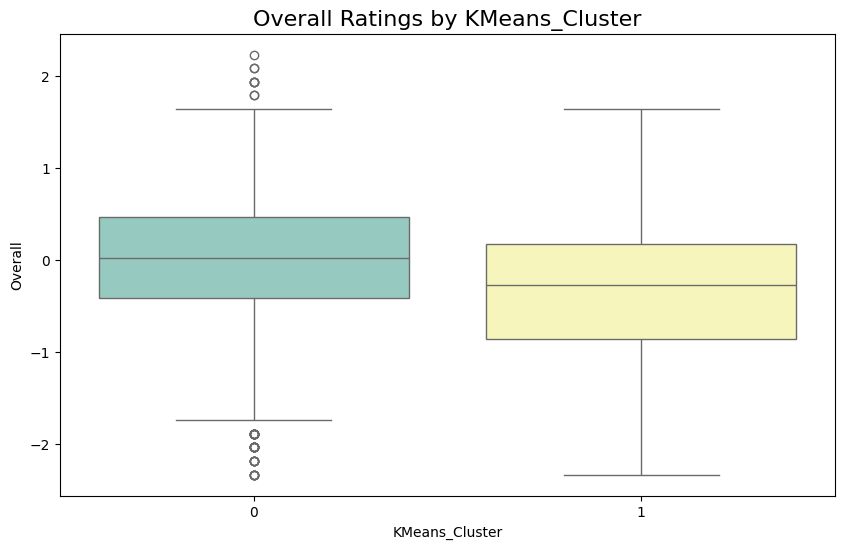

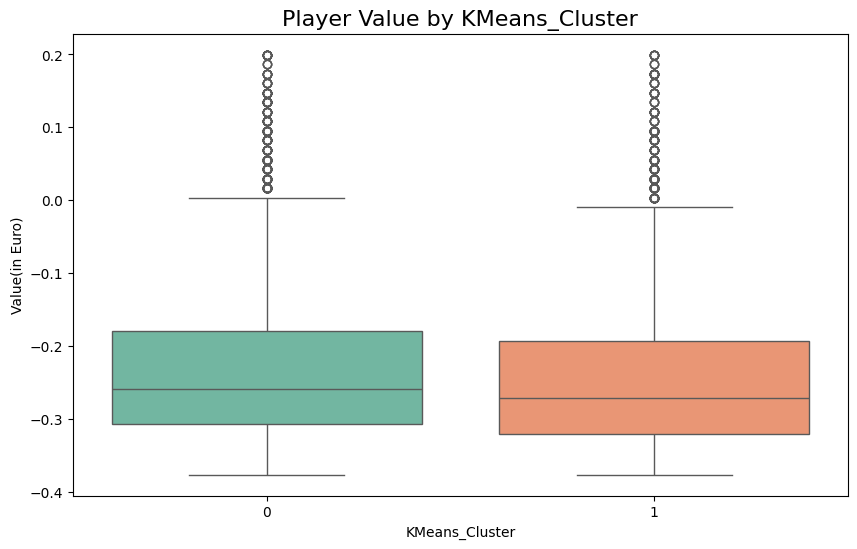

In [67]:
# Example: KMeans Clusters
plot_cluster_distributions(df, 'KMeans_Cluster', 'Overall', 'Overall Ratings', palette = 'Set3')
plot_cluster_distributions(df, 'KMeans_Cluster', 'Value(in Euro)', 'Player Value', palette = 'Set2')

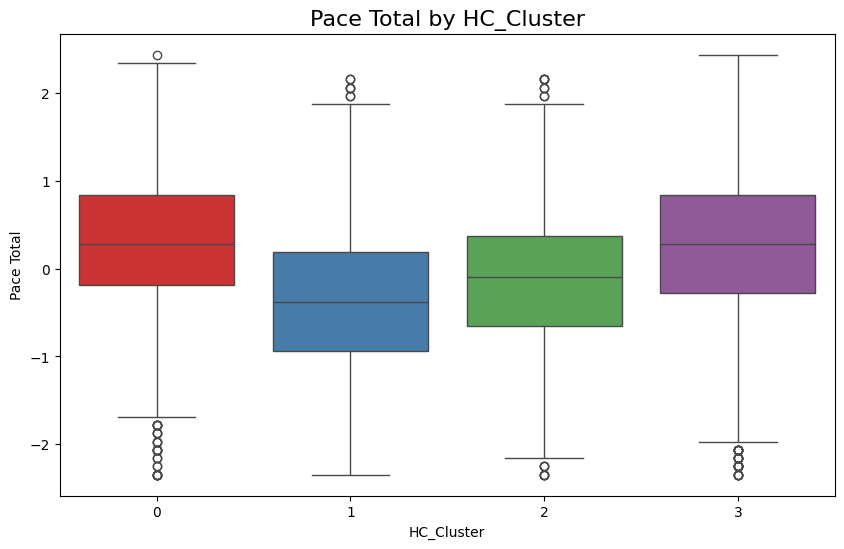

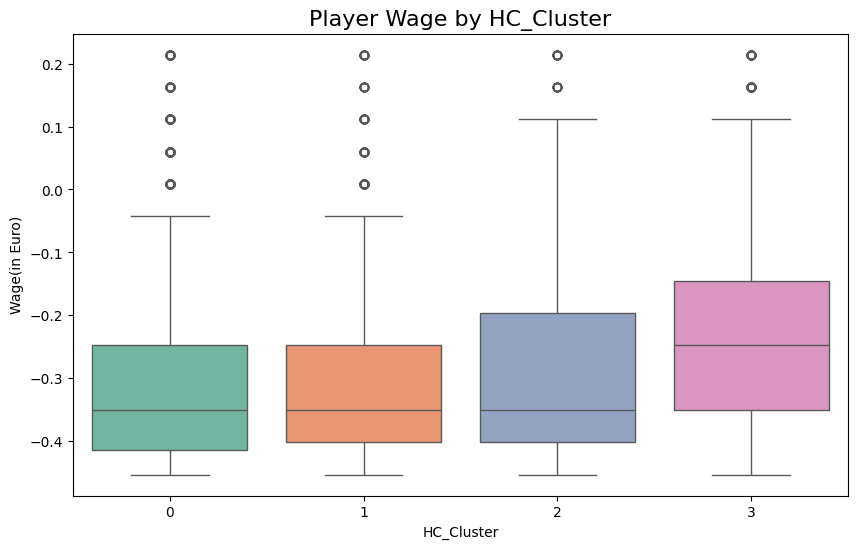

In [68]:
# Example: Hierarchical Clusters
plot_cluster_distributions(df, 'HC_Cluster', 'Pace Total', 'Pace Total', palette = 'Set1')
plot_cluster_distributions(df, 'HC_Cluster', 'Wage(in Euro)', 'Player Wage', palette = 'Set2')

Note: Excluding noise cluster (-1) in DBSCAN visualizations.


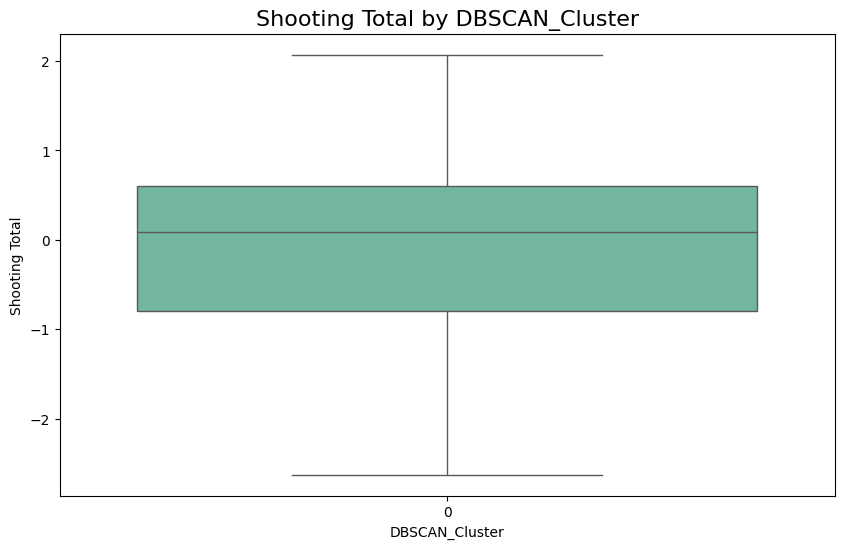

In [69]:
# Example: DBSCAN Clusters
if -1 in df['DBSCAN_Cluster'].unique():
    print("Note: Excluding noise cluster (-1) in DBSCAN visualizations.")
    plot_cluster_distributions(df[df['DBSCAN_Cluster'] != -1], 'DBSCAN_Cluster', 'Shooting Total', 'Shooting Total', palette = 'Set2')

<h3 style = "color : #318CE7; font-family : 'Pacifico', cursive;"> 5. t-SNE Visualization of Clusters </h3>

<b style = "color : #A1CAF1; font-family : 'Pacifico', cursive;"> Visualizing clusters in 2D space using t-SNE results to observe separations. </b>

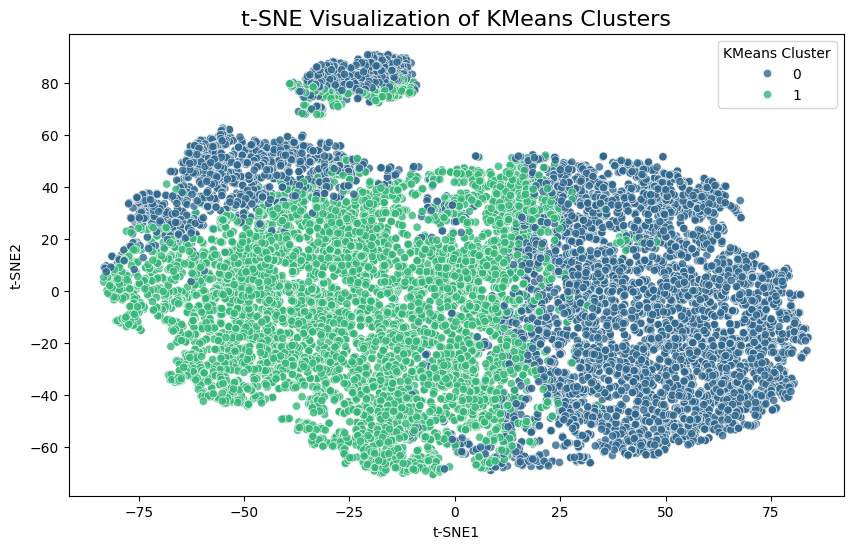

In [70]:
# Scatterplot for t-SNE Clusters (KMeans Example)
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 't-SNE1', y = 't-SNE2', hue = 'KMeans_Cluster', data = df, palette = 'viridis', alpha = 0.8)
plt.title('t-SNE Visualization of KMeans Clusters', fontsize = 16)
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.legend(title = 'KMeans Cluster')
plt.show()

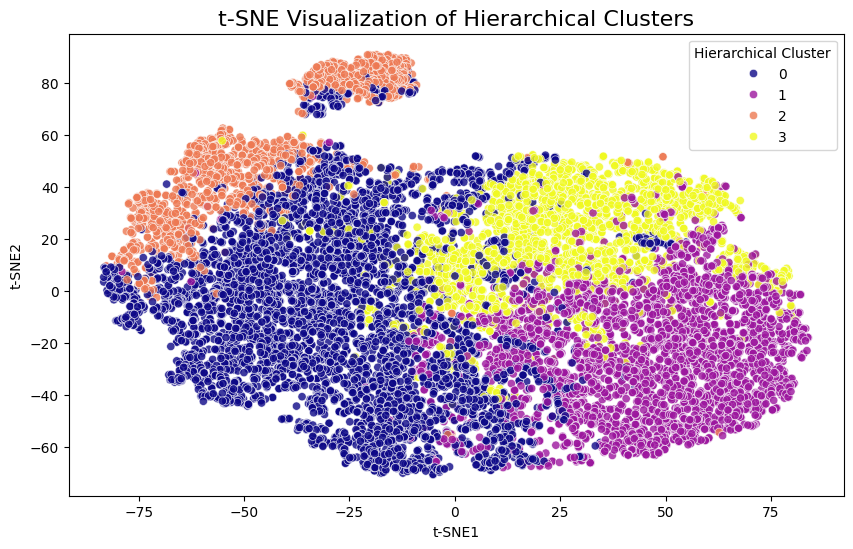

In [71]:
# Scatterplot for t-SNE Clusters (Hierarchical Example)
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 't-SNE1', y = 't-SNE2', hue = 'HC_Cluster', data = df, palette = 'plasma', alpha = 0.8)
plt.title('t-SNE Visualization of Hierarchical Clusters', fontsize = 16)
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.legend(title = 'Hierarchical Cluster')
plt.show()

<h2 style = "color : #6495ED; font-family : 'Pacifico', cursive;"> Model Deployment </h2>

<h3 style = "color : #FF6F61; font-family : 'Pacifico', cursive;"> Saving the Trained Model </h3>

In [84]:
import joblib

# Preparing new data
selected_features = ['Overall', 'Potential', 'Pace Total', 'Shooting Total', 'Passing Total', 'Dribbling Total']

# Saving scaler after fitting on training data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[selected_features])
joblib.dump(scaler, 'scaler.pkl')

# Saving the trained KMeans model
joblib.dump(kmeans, 'kmeans_model.pkl')

# Save the trained Hierarchical Clustering model
joblib.dump(agglo_clustering, 'hierarchical_model.pkl')

# Save the trained DBSCAN model
joblib.dump(dbscan, 'dbscan_model.pkl')

print("Scaler and models saved successfully!")

Scaler and models saved successfully!


<h3 style = "color : #FF6F61; font-family : 'Pacifico', cursive;"> Creating a Prediction Function </h3>

In [85]:
# Loading scaler and models
scaler = joblib.load('scaler.pkl')
kmeans_model = joblib.load('kmeans_model.pkl')

# Using the exact feature set from training
new_data = df[selected_features].iloc[:10]

# Scaling the new data
scaled_new_data = scaler.transform(new_data)

# Predicting using KMeans
kmeans_predictions = kmeans_model.predict(scaled_new_data)
print("KMeans Predictions:", kmeans_predictions)

KMeans Predictions: [0 0 0 0 0 0 0 0 0 0]


In [86]:
# Loading models
hc_model = joblib.load('hierarchical_model.pkl')
dbscan_model = joblib.load('dbscan_model.pkl')

# Hierarchical Clustering Prediction
hc_predictions = hc_model.fit_predict(scaled_new_data)
print("Hierarchical Clustering Predictions:", hc_predictions)

# DBSCAN Prediction
dbscan_predictions = dbscan_model.fit_predict(scaled_new_data)
print("DBSCAN Predictions:", dbscan_predictions)

Hierarchical Clustering Predictions: [0 0 0 1 1 1 0 2 3 1]
DBSCAN Predictions: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
